# **Financial Management System:**

The Financial Management System is a software that is used to check the
authenticity of a particular transaction in a financial company.


Importing the required libraries

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_1= pd.read_csv('/content/drive/MyDrive/AIML_Dataset.csv')
df_1.head()   #reading the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df_1.shape  #all loaded into google drive

(6362620, 11)

In [6]:
df_1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df_1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No missing values detected.

# **EDA - Exploratory Data Analysis**

In [9]:
df_1.type.value_counts()   # counting the five different types of transfers

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
df_1.isFraud.value_counts()  

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
df_1.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

Only in 16 cases, IsFlaggedFraud is set to 1 i.e. 16 is **0.00025%** of 6362620. Thus it's insignificant for our analysis and has to be eliminated.

In [12]:
df_1.drop('isFlaggedFraud',inplace=True, axis=1)

In [13]:
df_1.groupby(['type', 'isFraud']).count()

step   amount  ...  oldbalanceDest  newbalanceDest
type     isFraud                    ...                                
CASH_IN  0        1399284  1399284  ...         1399284         1399284
CASH_OUT 0        2233384  2233384  ...         2233384         2233384
         1           4116     4116  ...            4116            4116
DEBIT    0          41432    41432  ...           41432           41432
PAYMENT  0        2151495  2151495  ...         2151495         2151495
TRANSFER 0         528812   528812  ...          528812          528812
         1           4097     4097  ...            4097            4097

[7 rows x 8 columns]

Cash out and transfer have shown signs of fraud occurence.

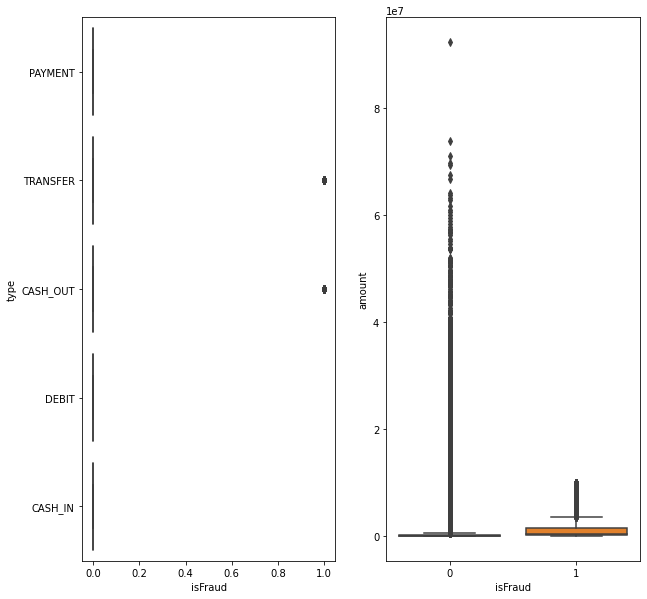

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'isFraud', y = 'type', data =df_1 )
plt.subplot(1,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = df_1)
plt.show()

Median of isFraud=1 is higher in amount category than isFraud=0. 
Also the box plot for type clearly shows fraud occuring in only CASH_OUT and TRANSFER.


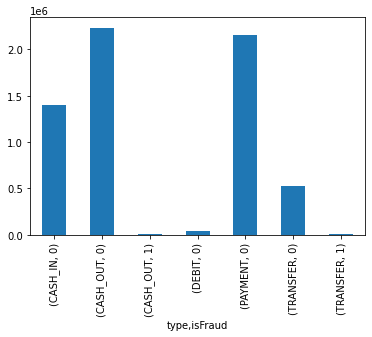

In [15]:
df_1.groupby(['type', 'isFraud']).size().plot(kind='bar')  # same result as box plot in the bar plot also, fraud is shown 
                                                           #in cash_out and transfer

<Figure size 864x864 with 0 Axes>

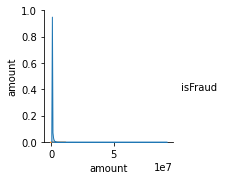

In [16]:
plt.figure(figsize=(12,12))
sns.pairplot(df_1[['amount','isFraud','type']], hue='isFraud')

There's an error shown in the balances after every transaction, but no column exists with the errors displayed. Thus creating *errorintransaction* column

In [17]:
df_1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [18]:
df_1['errorintransaction_Org'] =(df_1.newbalanceOrig + df_1.amount)-df_1.oldbalanceOrg  #sender

Same error case applies for reciever's balance in account too hence creating another column for reciever's.

In [19]:
df_1['errorintransaction_Dest'] =(df_1.oldbalanceDest + df_1.amount) -  df_1.newbalanceDest #reciever

In [20]:
df_1.columns  # checking columns after creating two new columns, columns are succesfully added in df_1

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'errorintransaction_Org', 'errorintransaction_Dest'],
      dtype='object')

Looking at relation between error columns and fraud

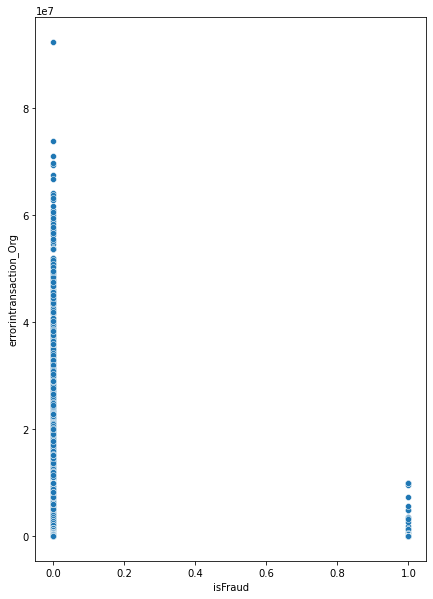

In [21]:
plt.figure(figsize=(7,10))

sns.scatterplot(x = 'isFraud', y = 'errorintransaction_Org', data = df_1)
plt.show()

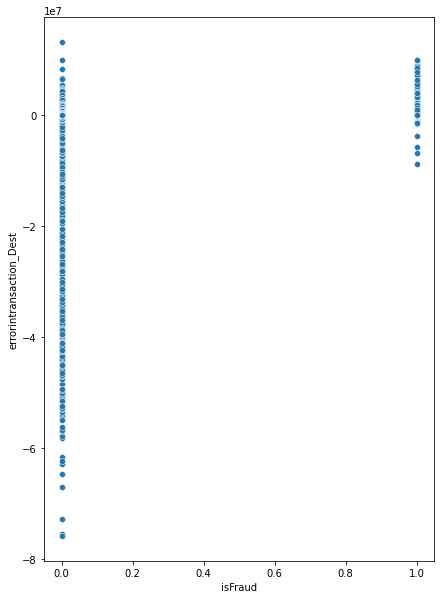

In [22]:
plt.figure(figsize=(7,10))

sns.scatterplot(x = 'isFraud', y = 'errorintransaction_Dest', data = df_1)
plt.show()

Looking at both the plots, it is evident that the error in fraud cases is close to 0.

In [23]:
df_1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorintransaction_Org,errorintransaction_Dest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0.0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0.0,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0.0,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0.0,11668.14


# **Cleaning the data:**

Dropped the column isFlaggedFraud because of the conclusions evident from our EDA process.
Cash_out and tranfer being the only types of transactions in which fraud occurs we are dropping the rest.

In [24]:
filter1 = df_1['type'].isin(['CASH_OUT','TRANSFER'])
# filter2 = df_1['type'].isin(['TRANSFER'])
df_1[filter1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorintransaction_Org,errorintransaction_Dest
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0.00,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,213808.94,1.827035e+05
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,214605.30,2.377353e+05
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0.00,8.500025e+05


In [25]:
df_2 = df_1[filter1]

In [26]:
df_2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorintransaction_Org,errorintransaction_Dest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,300850.89,-2401220.0


Converting categorical variable cash_out and transfer into numeric form.

In [27]:
df_2.type=df_2.type.replace(to_replace=['CASH_OUT', 'TRANSFER'], value=[0, 1])

In [28]:
df_2.info() #checking the dtype of type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   step                     int64  
 1   type                     int64  
 2   amount                   float64
 3   nameOrig                 object 
 4   oldbalanceOrg            float64
 5   newbalanceOrig           float64
 6   nameDest                 object 
 7   oldbalanceDest           float64
 8   newbalanceDest           float64
 9   isFraud                  int64  
 10  errorintransaction_Org   float64
 11  errorintransaction_Dest  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 274.8+ MB


In [29]:
df_2.type=df_2.type.astype(int)

Removing columns nameOrig and nameDest as they have no significance to the modelling process.

In [30]:
df_2.drop(['nameOrig'],inplace=True, axis=1)

In [31]:
df_2.drop(['nameDest'],inplace=True, axis=1)

In [32]:
df_2.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'errorintransaction_Org',
       'errorintransaction_Dest'],
      dtype='object')

# **Modelling using XGBoost**

In [51]:
import numpy as np
import xgboost as xgb
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score,precision_recall_curve,precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score,roc_curve

from sklearn.model_selection import train_test_split


In [34]:
#x and y variables assign
X=df_2.drop(['isFraud'], axis=1)
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorintransaction_Org,errorintransaction_Dest
2,1,1,181.00,181.0,0.0,0.0,0.00,0.00,181.0
3,1,0,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5
19,1,1,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0


In [35]:
y = df_2['isFraud']

**Test-Train split:**

In [36]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Next, we will be making a baseline model which ignores the fact that the classes are imbalanced and see how it will perform.

In [37]:
dtrain= xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [38]:
params = {
    'eta':1, 
    'max_depth': 3,  
    'objective':'binary:logistic',  
    'silent':1} 

steps = 15 

In [39]:
model= xgb.train(params,dtrain,steps)
y_test_preds= (model.predict(dtest)>0.5).astype('int')

In [40]:
pd.crosstab(
    pd.Series(y_test,name='Actual'),
    pd.Series(y_test_preds,name='Predicted'),
    margins=True
)

Predicted,0,1,All
Actual,,,
0,110409,331,110740
1,124,0,124
All,110533,331,110864


In [41]:
print("Precision = {}".format(precision_score(y_test, y_test_preds)))
print("Recall = {}".format(recall_score(y_test,y_test_preds)))
print("Accuracy = {}".format(accuracy_score(y_test,y_test_preds)))

Precision = 0.9995929995929996
Recall = 0.9951377633711507
Accuracy = 0.9999843585125187


Custom weights

In [42]:
weights= np.zeros(len(y_train))
weights[y_train==0]=1
weights[y_train==1]=10

In [43]:
dtrain= xgb.DMatrix(X_train,label=y_train,weight=weights)
dtest=xgb.DMatrix(X_test)

In [44]:
model= xgb.train(params,dtrain,steps)
y_test_preds= (model.predict(dtest)>0.5).astype('int')

In [45]:
pd.crosstab(
    pd.Series(y_test,name='Actual'),
    pd.Series(y_test_preds,name='Predicted'),
    margins=True
)

Predicted,0,1,All
Actual,,,
0,110402,338,110740
1,124,0,124
All,110526,338,110864


In [46]:
print("Precision = {}".format(precision_score(y_test, y_test_preds)))
print("Recall = {}".format(recall_score(y_test,y_test_preds)))
print("Accuracy = {}".format(accuracy_score(y_test,y_test_preds)))

Precision = 0.9738199127330425
Recall = 0.9947325769854133
Accuracy = 0.9999049478837669


UNDERSAMPLING


In [67]:
def generate_model_report(Y_test,Y_Test_pred):
    print("Precision = {}".format(precision_score(Y_test,Y_Test_pred)))
    print("Recall = {}".format(recall_score(Y_test,Y_Test_pred)))
    print("Accuracy = {}".format(accuracy_score(Y_test,Y_Test_pred)))
    print("F1-score = {}".format(f1_score(Y_test,Y_Test_pred)))
    pass

In [71]:
def generate_aoc_roc_curve(clf,X_test):
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(Y_test,y_pred_prob)
    auc= roc_auc_score(Y_test,y_pred_prob)
    plt.plot(fpr,tpr,label='ROC CURVE with auc='+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [61]:
X= df_2.loc[:,df_2.columns!='isFraud']

In [62]:
Y= df_2.loc[:,df_2.columns=='isFraud']

In [63]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=11)

In [64]:
Y_train['isFraud'].value_counts()

0    1933598
1       5688
Name: isFraud, dtype: int64

In [65]:
clf=LogisticRegression().fit(X_train,Y_train)

In [66]:
Y_Test_pred= clf.predict(X_test)

In [68]:
generate_model_report(Y_test,Y_Test_pred)

Precision = 0.49790405216581274
Recall = 0.42336633663366335
Accuracy = 0.9969511131324725
F1-score = 0.4576198630136986


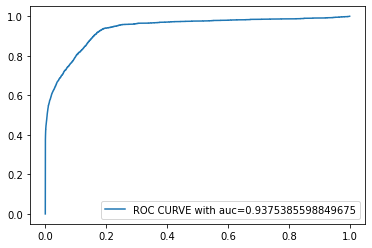

In [72]:
generate_aoc_roc_curve(clf,X_test)

In [73]:
#undersampling starts here
minority_class_len= len(df_2[df_2['isFraud']==1])
minority_class_len

8213

In [74]:
majority_class_indices =df_2[df_2['isFraud']==0].index
majority_class_indices

Int64Index([     15,      19,      24,      42,      47,      48,      51,
                 58,      60,      70,
            ...
            6362268, 6362276, 6362296, 6362304, 6362306, 6362313, 6362317,
            6362320, 6362321, 6362322],
           dtype='int64', length=2762196)

In [75]:
random_majority_indices= np.random.choice(majority_class_indices,minority_class_len,replace=False)
len(random_majority_indices)

8213

In [76]:
minority_class_indices = df_2[df_2['isFraud']==1].index
minority_class_indices

Int64Index([      2,       3,     251,     252,     680,     681,     724,
                969,     970,    1115,
            ...
            6362610, 6362611, 6362612, 6362613, 6362614, 6362615, 6362616,
            6362617, 6362618, 6362619],
           dtype='int64', length=8213)

In [77]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [79]:
under_sample = df_2.loc[under_sample_indices]

In [82]:
X= under_sample.loc[:,df_2.columns!='isFraud']
Y= under_sample.loc[:,df_2.columns=='isFraud']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=11)
clf=LogisticRegression().fit(X_train,Y_train)
Y_Test_pred=clf.predict(X_test)

In [83]:
generate_model_report(Y_test,Y_Test_pred)

Precision = 0.884373845585519
Recall = 0.9645447219983884
Accuracy = 0.9186282467532467
F1-score = 0.9227211408749277


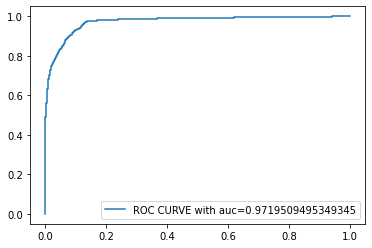

In [84]:
generate_aoc_roc_curve(clf,X_test)